In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1

In [111]:
def xy_a_s(x, y, L):
    return y * L + x

def s_a_xy(s, L):
    return s % L, s // L

def vecino(s, j, L, empty):
    if j == 0:  
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 1:  
        if s // L == L - 1:
            return empty
        else:
            return s + L
    elif j == 2:  
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 3:  
        if s // L == 0:
            return empty
        else:
            return s - L

def boundaries(L, N, empty):
    nn = np.zeros((N, 4), dtype=int)
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j, L, empty)
    return nn

In [112]:
def HLA(L, N, p, nn, empty):
    site = np.zeros(N, dtype=np.short)
    
    xseed, yseed = L // 2, L // 2
    sseed = xy_a_s(xseed, yseed, L)
    site[sseed] = 1  
    cluster = np.array([sseed])
    
    per = np.array([nn[sseed, j] for j in range(4) if nn[sseed, j] != empty], dtype=int)
    site[per] = 2  
    
    while len(per) > 0:
        index = np.random.randint(len(per))
        snew = per[index]
        per = np.delete(per, index)
        escPer = np.random.random()
        if escPer < p:
            site[snew] = 1  
            cluster = np.append(cluster, snew)
            for j in range(4):
                sper = nn[snew, j]
                if sper != empty and site[sper] == 0:
                    per = np.append(per, sper)
                    site[sper] = 2  
        else:
            site[snew] = empty
        
    return site, cluster

[[  1  16  -1  -1]
 [  2  17   0  -1]
 [  3  18   1  -1]
 ...
 [254  -1 252 237]
 [255  -1 253 238]
 [ -1  -1 254 239]]
[136 137 153 121 152 154 138 122 123 124 125 106 126 141 110 140 139 156
 157 158 174 173 189 159 143 205 206 175 221 237 191 207 238 236 239 235
 219 218 203 234 254 251 250 217 201 249 216 185 215 184 199 248 231 247
 198 182 246 166 165 149 133 134 118 119 132 103 150 116 100 131 130 115
  87 129 101  71 114  70 128  54  69  86  55  84 113  72  98  53  38  52
  36  82  20  51  67  88  89  73  22  74  66  23  35  58  57  42  75  34
  41  40  76  25   9  60  92  18  61  93  77  45  29  26  33  27  62  13
  14]
[ 0  0 -1  0 -1  0 -1 -1 -1  1 -1 -1 -1  1  1 -1  0 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1  1 -1  0 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1  0
  0 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  0 -1  1  1 -1  1  1  1
  1  1  1  1  1  1 -1  0  0 -1  1 -1  1 -1  1  1  1  1 -1 -1  1  1 -1  0
  0 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1  

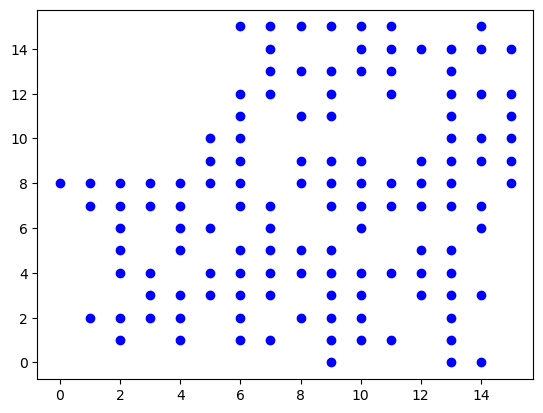

In [113]:
L = 16
p = 0.59275
N = L * L
empty = -1

nn = boundaries(L, N, empty)

site, cluster = HLA(L, N, p, nn, empty)

print(nn)
print(cluster)
print(site)

ncluster = np.array([s_a_xy(s, L) for s in cluster])

fig, ax = plt.subplots()
ax.plot(ncluster[:, 0], ncluster[:, 1], 'bo')
plt.show()


/var/folders/yv/xkr121fn6sg196g8ytf0bq3m0000gn/T/ipykernel_22187/929198595.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x, y), 1, 1, color='r', edgecolor='k')


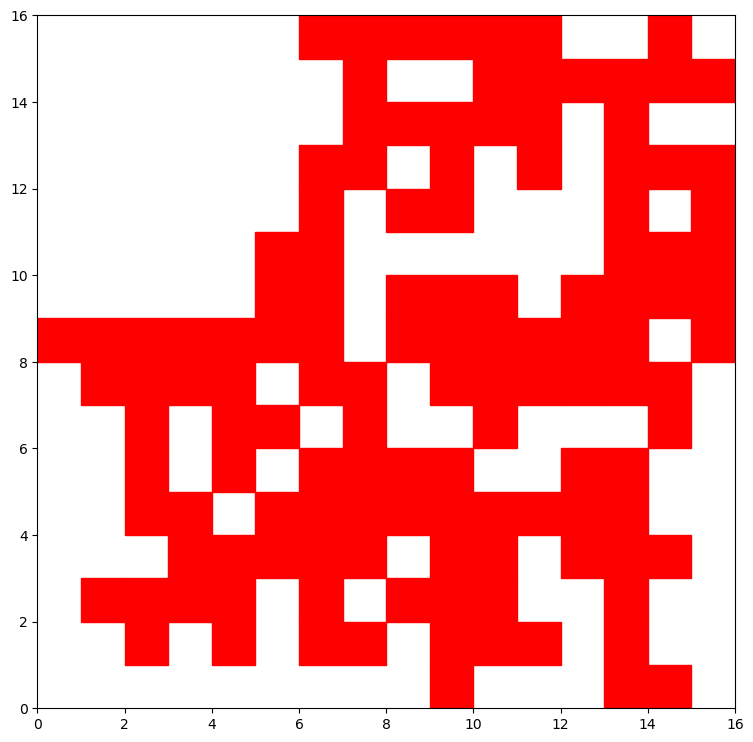

In [114]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1)
for x, y in ncluster:
    rect = plt.Rectangle((x, y), 1, 1, color='r', edgecolor='k')
    ax.add_patch(rect)

plt.xlim(0, L)
plt.ylim(0, L)
plt.show()

# 2

In [115]:
def MassDist(L, cluster):
    cluster_coords = np.array([s_a_xy(s, L) for s in cluster])
    xCluster, yCluster = cluster_coords[:, 0], cluster_coords[:, 1]
    
    Ncluster = xCluster.size

    xcm = xCluster[:Ncluster].mean()
    ycm = yCluster[:Ncluster].mean()

    dx = xCluster[:Ncluster] - xcm
    dy = yCluster[:Ncluster] - ycm
    dr = np.sqrt(dx*dx + dy*dy)

    mass_dis = []
    r = []
    
    imax = int(np.log2(L))
    for i in range(1, imax):
        mass_dis.append(dr[dr < (2**i)].size)
        r.append(2**i)

    return np.array(r), np.array(mass_dis)

In [116]:
def MassDist2(L, cluster):
    cluster_coords = np.array([s_a_xy(s, L) for s in cluster])
    xCluster, yCluster = cluster_coords[:, 0], cluster_coords[:, 1]
    
    xcm = np.mean(xCluster)
    ycm = np.mean(yCluster)
    
    dx = xCluster - xcm
    dy = yCluster - ycm
    dr = np.sqrt(dx**2 + dy**2)
    
    r_values = np.arange(1, L//2)
    mass_dis = np.zeros_like(r_values, dtype=float)
    
    for i, r in enumerate(r_values):
        mass_dis[i] = np.sum(dr < r)
        
    return r_values, mass_dis

In [117]:
def lineFit(x, y):
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

In [118]:
def correr(L, N, p, nn, empty, num_realizaciones):
    massDtot = []

    for _ in range(num_realizaciones):
        site, cluster = HLA(L, N, p, nn, empty)
        r, massD = MassDist(L, cluster)
        massDtot.append(massD)

    # Average the mass distributions
    massDprom = np.mean(massDtot, axis=0)
    
    return r, massDprom

In [119]:
def correr2(L, N, p, nn, empty, num_realizaciones):
    massDtot = []

    for _ in range(num_realizaciones):
        site, cluster = HLA(L, N, p, nn, empty)
        r, massD = MassDist2(L, cluster)
        massDtot.append(massD)

    # Average the mass distributions
    massDprom = np.mean(massDtot, axis=0)
    
    return r, massDprom

In [120]:
L = 16
p = 0.59275
N = L * L
empty = -1
realizaciones = 100
nn = boundaries(L, N, empty)

r, massDprom = correr(L, N, p, nn, empty, realizaciones)
r2, massDprom2 = correr2(L, N, p, nn, empty, realizaciones)

In [121]:
slope, corte = lineFit(np.log(r),np.log(massDprom))
error = np.abs((slope-1.89)/1.89)*100
print('dimension fractal = {}, error = {} %'.format(round(slope,2),round(error,1)))

dimension fractal = 1.64, error = 13.0 %


Text(2, 70.749, '$d_f =$ 1.64')

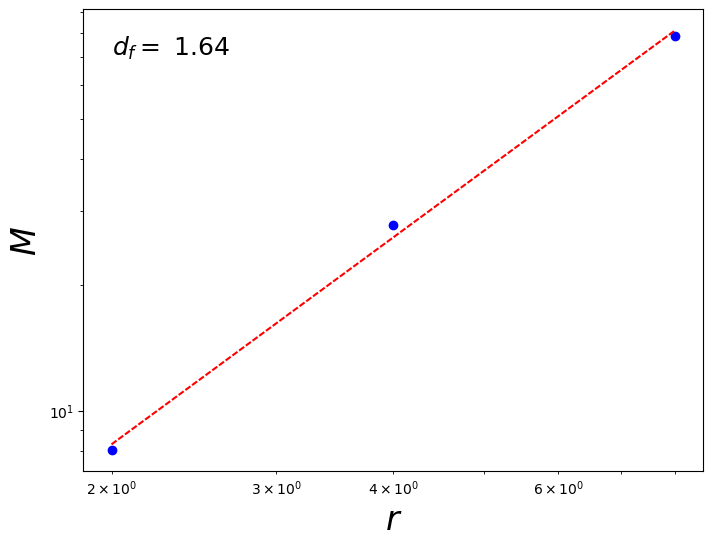

In [122]:
plt.figure(figsize=(8,6))
plt.loglog(r, massDprom, 'bo')
plt.plot(r, np.exp(corte) * r**slope, color = 'red', dashes = (3,1))
plt.xlabel(r'$r$',fontsize = 24)
plt.ylabel(r'$M$',fontsize = 24)
plt.text(r.min(), 0.9 * massDprom.max(),r'$d_f =$ {}'.format(round(slope,2)), fontsize = 18)

In [123]:
slope2, intercept2 = lineFit(np.log(r2), np.log(massDprom2))
error2 = np.abs((slope2 - 1.89) / 1.89) * 100
print('Fractal dimension = {}, error = {} %'.format(round(slope2, 2), round(error2, 1)))

Fractal dimension = 1.81, error = 4.2 %


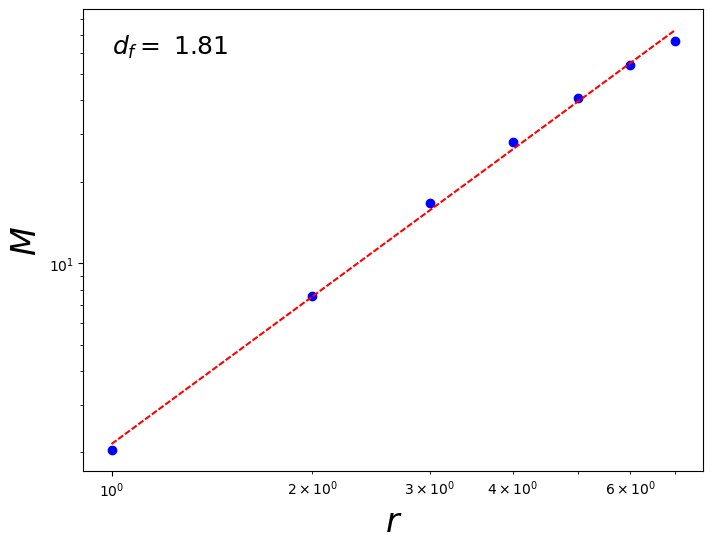

In [124]:
plt.figure(figsize=(8, 6))
plt.loglog(r2, massDprom2, 'bo')
plt.plot(r2, np.exp(intercept2) * r2**slope2, color='red', dashes=(3, 1))
plt.xlabel(r'$r$', fontsize=24)
plt.ylabel(r'$M$', fontsize=24)
plt.text(r2.min(), 0.9 * massDprom2.max(), r'$d_f =$ {}'.format(round(slope2, 2)), fontsize=18)
plt.show()

# 3

In [125]:
def box_counting(x, y, L, df_teórico=None):
    sizes = np.power(2, np.arange(1, np.log2(L//2).astype(int) + 1))
    counts = []
    
    for size in sizes:
        nl = L // size
        grid = np.zeros((nl, nl), dtype=bool)
        x_indices = (x // size).astype(int)
        y_indices = (y // size).astype(int)
        grid[y_indices, x_indices] = True
        counts.append(np.sum(grid))

    log_sizes = np.log(sizes)
    log_counts = np.log(counts)

    model = LinearRegression()
    model.fit(log_sizes.reshape(-1, 1), log_counts)
    slope = -model.coef_[0]

    error = 0
    if df_teórico:
        error = np.abs((slope - df_teórico) / df_teórico) * 100

    return slope, error

In [126]:
L = 16
p = 0.59275
N = L * L
empty = -1
nn = boundaries(L, N, empty)  

site, cluster = HLA(L, N, p, nn, empty)
ncluster = np.array([s_a_xy(s, L) for s in cluster])

df_teórico = 1.89
df_estimado, error = box_counting(ncluster[:, 0], ncluster[:, 1], L, df_teórico)
print(f'Dimensión Fractal: {df_estimado}, Error: {error:.2f}%')

Estimated fractal dimension: 1.8639602272815994, Error: 1.38%


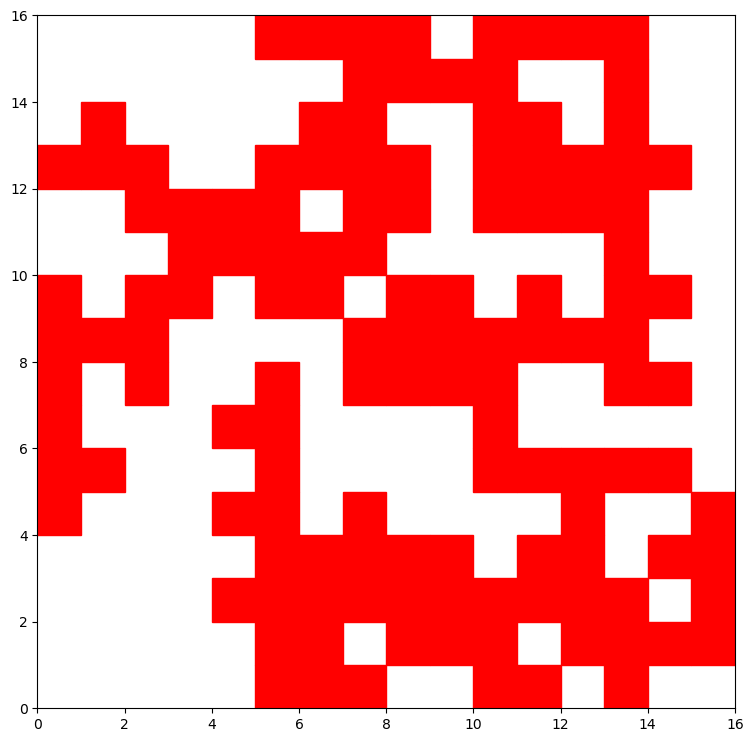

In [132]:
tamaño_caja = 1  
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)

for x, y in ncluster:
    rect = plt.Rectangle((x, y), tamaño_caja, tamaño_caja, color='r')
    ax.add_patch(rect)

ax.set_xlim([0, L])
ax.set_ylim([0, L])

for i in range(0, L, 2**5):
    ax.axhline(i, color='black', dashes=(1, 2), zorder=1)
    ax.axvline(i, color='black', dashes=(1, 2), zorder=1)

plt.show()

## Comparando resultados

In [128]:
print("Anillos concéntricos")
print('Fractal dimension = {}, error = {} %'.format(round(slope2, 2), round(error2, 1)))

print("Box counting")
print(f'Dimensión Fractal: {df_estimado}, Error: {error:.2f}%')

Anillos concéntricos
Fractal dimension = 1.81, error = 4.2 %
Box counting
Dimensión Fractal: 1.8639602272815994, Error: 1.38%


En general el método de conteo de cajas es más eficiente para manejar grandes conjuntos de datos, ya que principalmente implica contar cajas ocupadas.

Esto hace que el método de conteo de cajas sea más práctico para estudios de dimensiones fractales, especialmente en investigaciones donde la estructura del fractal no es uniformemente radial o se manejan grandes volúmenes de datos.